# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [5]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

In [6]:
url ="https://es.wikipedia.org/wiki/Caballeros_Reales_(Digimon)#:~:text=Los%20Caballeros%20Reales%20(%E3%83%AD%E3%82%A4%E3%83%A4%E3%83%AB%E3%83%8A%E3%82%A4%E3%83%84,la%20era%20mitol%C3%B3gica%20del%20Digimundo."
response = requests.get(url)

if response:
    sopa = BeautifulSoup(response.text, 'html')
#sopa

In [7]:
html = io.StringIO(response.text)
tables = pd.read_html(html)
print(f"Se encontraron {len(tables)} tablas.")

Se encontraron 3 tablas.


In [8]:
df = tables[1]
df.head(1)

,Nombre USA,Nombre original,Katakana,¿Cómo nacen?
0,Omnimon,Omegamon,オメガモン,la Evolución Jogress de WarGreymon y MetalGaru...


In [9]:
import random
import numpy as np

df.columns = ["Nombre USA", "Nombre original", "Katakana", "Origen"]


df['Poder'] = np.random.randint(100, 201, size=len(df))
df['Año debut'] = np.random.randint(2004, 2008, size=len(df))

df

,Nombre USA,Nombre original,Katakana,Origen,Poder,Año debut
0,Omnimon,Omegamon,オメガモン,la Evolución Jogress de WarGreymon y MetalGaru...,171,2004
1,Magnamon,Magnamon,マグナモン,la Armodigievolución con el Digi-egg de los Mi...,114,2005
2,Gallantmon,Dukemon,デュークモン,La evolución Matrix/La digievolución mega de G...,124,2007
3,Dynasmon,Dynasmon,デュナスモン,Viene de la digievolución mega de Candlemon,190,2004
4,Crusadermon,LordKnightmon,ロードナイトモン,Viene de la digievolución mega de Knightmon,194,2006
5,UlforceVeedramon,Ulforce V-dramon,アルフォースブイドラモン,Viene de la digievolución mega de Veemon,137,2007
6,Alphamon,Alphamon,アルファモン,Viene de la digievolución mega de Dorumon,186,2004
7,Craniamon,Craniummon,クレニアムモン,es el Burst Mode de HiAndromon,195,2004
8,Kentaurosmon,Sleipmon,スレイプモン,Es la digievolución mega de Kudamon,140,2006
9,Leopardmon,Duftmon,ドゥフトモン,Se dice que es la evolución mega de Leormon o ...,122,2005


In [10]:
conn = sqlite3.connect("digimon.db")

df.to_sql("royalknights", conn, if_exists="replace", index=False)
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM royalknights")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 13


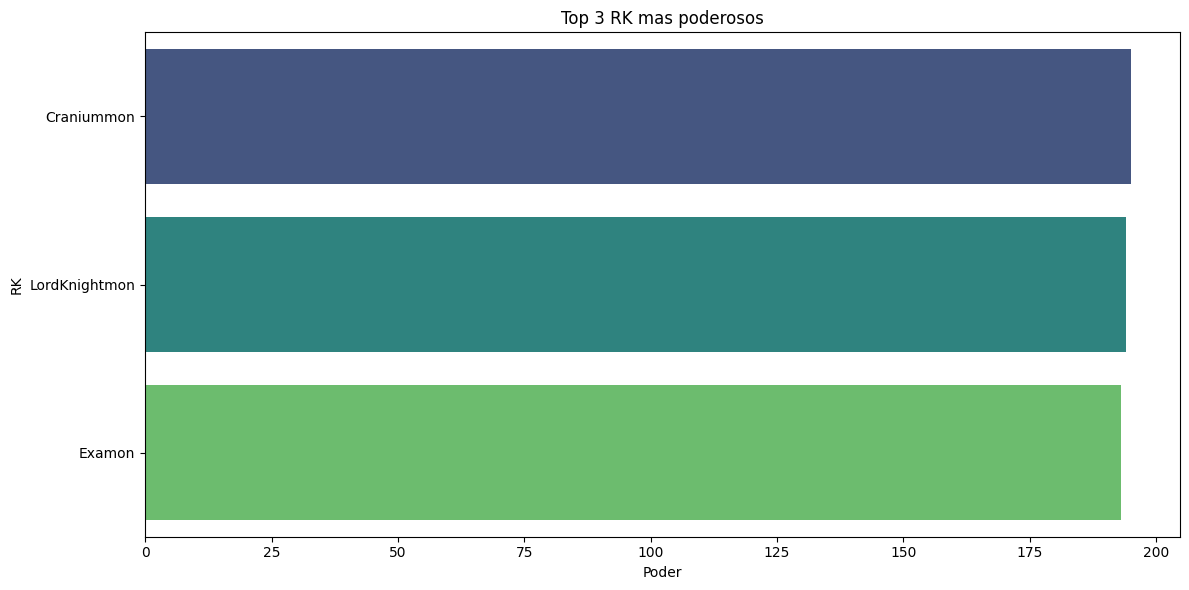

In [11]:
top_poder = df.nlargest(3, "Poder")
plt.figure(figsize=(12, 6))
sns.barplot(data=top_poder, x="Poder", y="Nombre original", hue="Nombre original", palette="viridis", legend=False)
plt.title("Top 3 RK mas poderosos")
plt.xlabel("Poder")
plt.ylabel("RK")
plt.tight_layout()
plt.show()

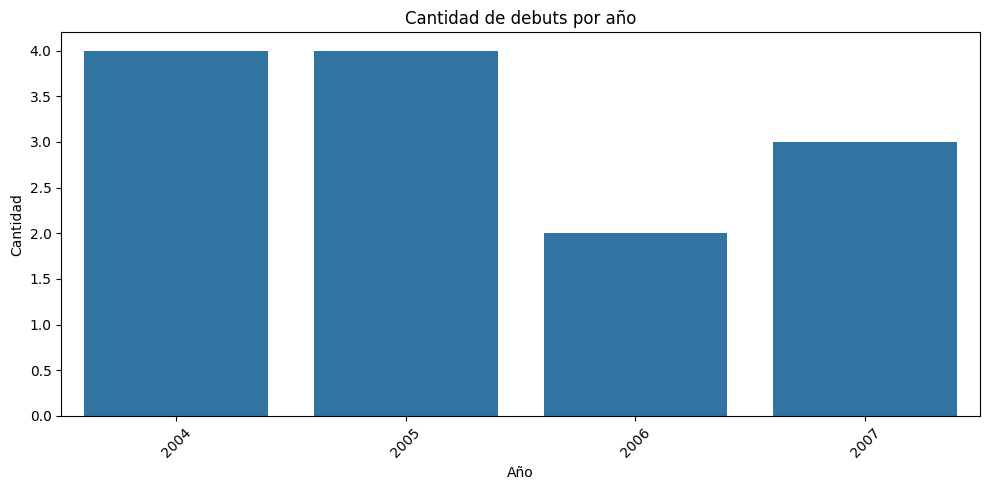

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Año debut", order=sorted(df["Año debut"].dropna().unique()))
plt.title("Cantidad de debuts por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()